In [2]:

## import all the libraries
from sklearn.linear_model import SGDRegressor
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt

First a simple case of linear regression

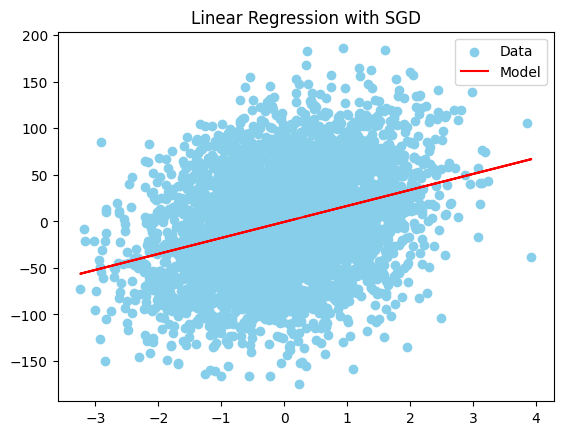

In [ ]:
# Generate dummy linear data
X, y = make_regression(n_samples=5000, n_features=1, noise=50, random_state=42)

# Create model using stochastic gradient descent
reg = SGDRegressor(max_iter=1000, learning_rate='invscaling', eta0=0.01)

# Fit the model
reg.fit(X, y)

# Plot results
plt.scatter(X, y, color='skyblue', label='Data')
plt.plot(X, reg.predict(X), color='red', label='Model')
plt.legend()
plt.title("Linear Regression with SGD")
plt.show()


Now something similar but with a logistic regression

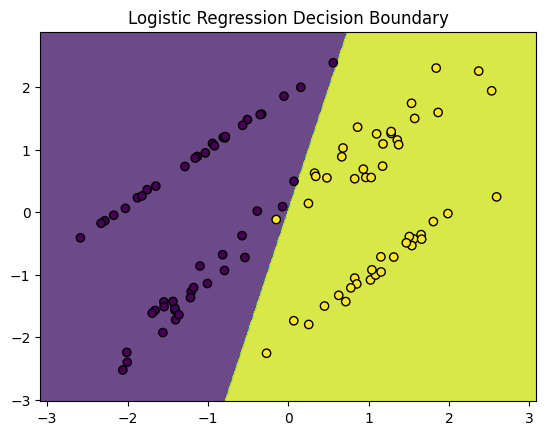

In [15]:
from sklearn.datasets import make_classification
from sklearn.linear_model import SGDClassifier
# Create binary classification data

X, y = make_classification(
    n_samples=100,
    n_features=2,
    n_informative=2,
    n_redundant=0,
    n_classes=2,
    random_state=42
)
# Train using SGD
clf = SGDClassifier(loss='log_loss', max_iter=1000, learning_rate='constant', eta0=0.01)
clf.fit(X, y)

# Prediction probability for visualization
import numpy as np
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5

xx, yy = np.meshgrid(np.arange(x_min, x_max, .01),
                     np.arange(y_min, y_max, .01))

Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot decision boundary
plt.contourf(xx, yy, Z, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k')
plt.title("Logistic Regression Decision Boundary")
plt.show()


What can we see in this plot ?
1 The classifier did a decent job. 
Most yellow points fall in the yellow region and purple ones in the purple—indicating good classification system.

2 A few misclassified points appear: they’re on the “wrong” side of the decision boundary.

3 The diagonal shape of the boundary shows how the model weighs the two features in class separation. 
   It's not perfectly horizontal or vertical, which means both features are informative.
